### Bibliotecas e Dataframe

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf, adfuller

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


In [314]:
df = pd.read_csv('dataset/corporacion-favorit/store44.csv')

df

,id,date,store_nbr,family,quantity,onpromotion
0,3036,2013-01-02,44,AUTOMOTIVE,16.000,0
1,3068,2013-01-02,44,SEAFOOD,150.367,0
2,3065,2013-01-02,44,PREPARED FOODS,616.862,0
3,3064,2013-01-02,44,POULTRY,1034.765,0
4,3061,2013-01-02,44,PERSONAL CARE,716.000,0
...,...,...,...,...,...,...
45593,3000362,2017-08-15,44,BEAUTY,9.000,1
45594,3000360,2017-08-15,44,AUTOMOTIVE,15.000,0
45595,3000391,2017-08-15,44,SCHOOL AND OFFICE SUPPLIES,345.000,12
45596,3000375,2017-08-15,44,HOME AND KITCHEN I,136.000,1


### Estatísticas Descritivas

In [315]:
print('maior venda:')
print(df.loc[df['quantity'].idxmax()])

print('')
print('menor venda:')
print(df.loc[df['quantity'].idxmin()])

maior venda:
id                 562596
date           2013-11-12
store_nbr              44
family          GROCERY I
quantity          46271.0
onpromotion             0
Name: 6668, dtype: object

menor venda:
id                   4832
date           2013-01-03
store_nbr              44
family           HARDWARE
quantity              1.0
onpromotion             0
Name: 20, dtype: object


In [316]:
df['quantity'].describe()

#mean = média aritmética
#std = desvio padrão

count    45598.000000
mean      1361.628871
std       2907.794710
min          1.000000
25%         24.000000
50%        281.752000
75%        997.610750
max      46271.000000
Name: quantity, dtype: float64

## Serie

In [317]:
produto_mv = ['GROCERY I']
produtos_mv = ['BEVERAGES', 'PRODUCE', 'CLEANING']

### Transformando em Serie

In [318]:
def transf_serie(df, produto):

    df = df.set_index('date')
    df = df.sort_index(inplace=False)

    serie = df[df['family'] == produto]['quantity']

    return serie

In [319]:
series_df = {}

series_df['GROCERY I'] = transf_serie(df, produto_mv[0])

series_df

{'GROCERY I': date
 2013-01-02    10686.0
 2013-01-03     7342.0
 2013-01-04     7250.0
 2013-01-05    10699.0
 2013-01-06    12373.0
                ...   
 2017-08-11     9979.0
 2017-08-12     9391.0
 2017-08-13     9811.0
 2017-08-14     8318.0
 2017-08-15     8123.0
 Name: quantity, Length: 1679, dtype: float64}

In [320]:
for prod in produtos_mv:

    series_df[prod] = transf_serie(df, prod)

series_df

{'GROCERY I': date
 2013-01-02    10686.0
 2013-01-03     7342.0
 2013-01-04     7250.0
 2013-01-05    10699.0
 2013-01-06    12373.0
                ...   
 2017-08-11     9979.0
 2017-08-12     9391.0
 2017-08-13     9811.0
 2017-08-14     8318.0
 2017-08-15     8123.0
 Name: quantity, Length: 1679, dtype: float64,
 'BEVERAGES': date
 2013-01-02     5466.0
 2013-01-03     3718.0
 2013-01-04     4112.0
 2013-01-05     6458.0
 2013-01-06     7939.0
                ...   
 2017-08-11     9517.0
 2017-08-12     9624.0
 2017-08-13    10491.0
 2017-08-14     7322.0
 2017-08-15     7351.0
 Name: quantity, Length: 1679, dtype: float64,
 'PRODUCE': date
 2013-03-16       57.000
 2013-03-17       21.000
 2013-03-18        1.000
 2013-03-20       15.000
 2013-03-21       17.000
                 ...    
 2017-08-11     9311.460
 2017-08-12     9153.445
 2017-08-13    11201.803
 2017-08-14     8735.741
 2017-08-15     7239.617
 Name: quantity, Length: 1603, dtype: float64,
 'CLEANING': date
 2013

## Analise Exploratoria das Series

### Componentes Básicas da Serie

In [321]:
def analise_serie(series_df, prod):

    print('')
    
    print(f'Estatisticas de {prod}')

    print(series_df[prod].describe())

    print('---'*30)

In [322]:
analise_serie(series_df, produto_mv[0])


Estatisticas de GROCERY I
count     1679.000000
mean      9759.413364
std       3541.684894
min       2990.000000
25%       7292.000000
50%       8808.000000
75%      11665.000000
max      46271.000000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------


In [323]:
for prod in produtos_mv:
    
    analise_serie(series_df, prod)


Estatisticas de BEVERAGES
count     1679.000000
mean      7991.577725
std       3866.395840
min       1804.000000
25%       4662.000000
50%       7589.000000
75%       9611.500000
max      25413.000000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------

Estatisticas de PRODUCE
count     1603.000000
mean      6653.810654
std       5520.192801
min          1.000000
25%         36.000000
50%       7930.961000
75%      11173.282000
max      17850.615000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------

Estatisticas de CLEANING
count    1679.000000
mean     2565.967838
std       664.160437
min       814.000000
25%      2065.500000
50%      2409.000000
75%      2988.000000
max      5869.000000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------


### Estacionaridade da Serie

In [324]:
def adf_serie(series_df, prod):

    print('')

    result = adfuller(series_df[prod])
    p_value = result[1]


    if p_value > 0.05:
        print(f"A série {prod} não é estacionária. Diferenciação necessária.")
    else:
        print(f"A série {prod} é estacionária. Nenhuma diferenciação necessária.")

    media_movel = series_df[prod].rolling(window=12).mean()
    desvio_padrao = series_df[prod].std()

    plt.figure(figsize=(20, 5))
    plt.plot(series_df[prod], color='deepskyblue')
    plt.plot(media_movel, color='orange', linestyle='--', label='media movel')

    plt.axhline(series_df[prod].mean() + desvio_padrao, color='green', linestyle='--', label='intervalo de concentração')
    plt.axhline(series_df[prod].mean() - desvio_padrao, color='green', linestyle='--')
    plt.axhline(series_df[prod].mean(), color='red', linestyle='--', label='media')
    
    plt.title('Estacionaridade de ' + prod)
    plt.xlabel('Tempo')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()

    print('---'*60)
    print('')


A série GROCERY I é estacionária. Nenhuma diferenciação necessária.


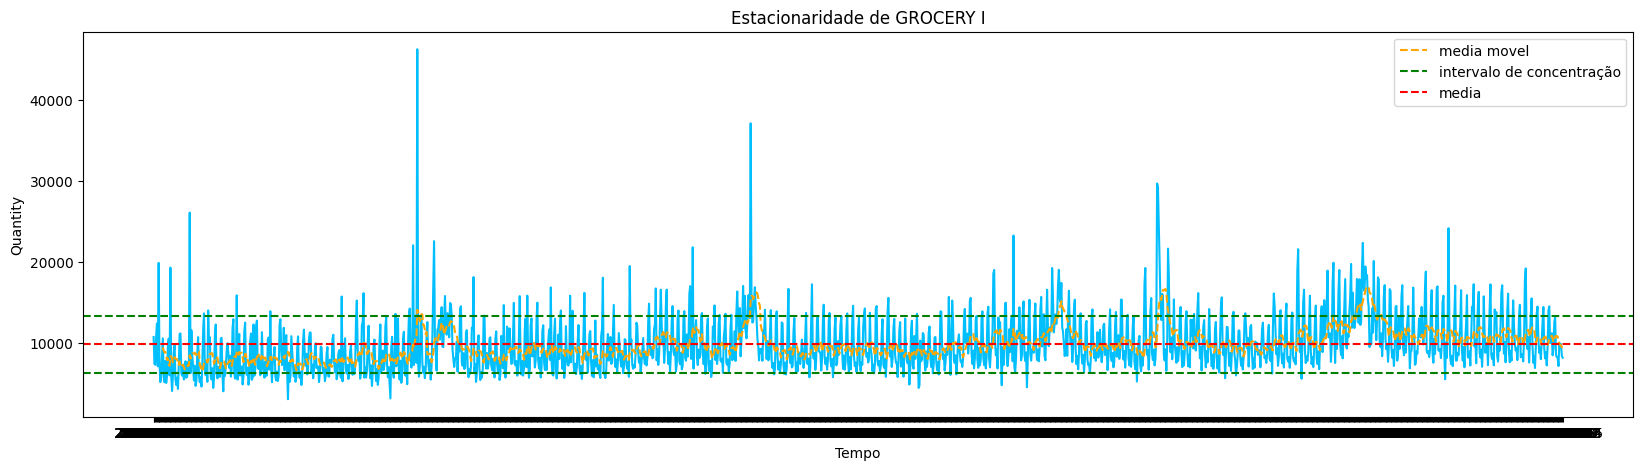

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [325]:
adf_serie(series_df, produto_mv[0])


A série BEVERAGES é estacionária. Nenhuma diferenciação necessária.


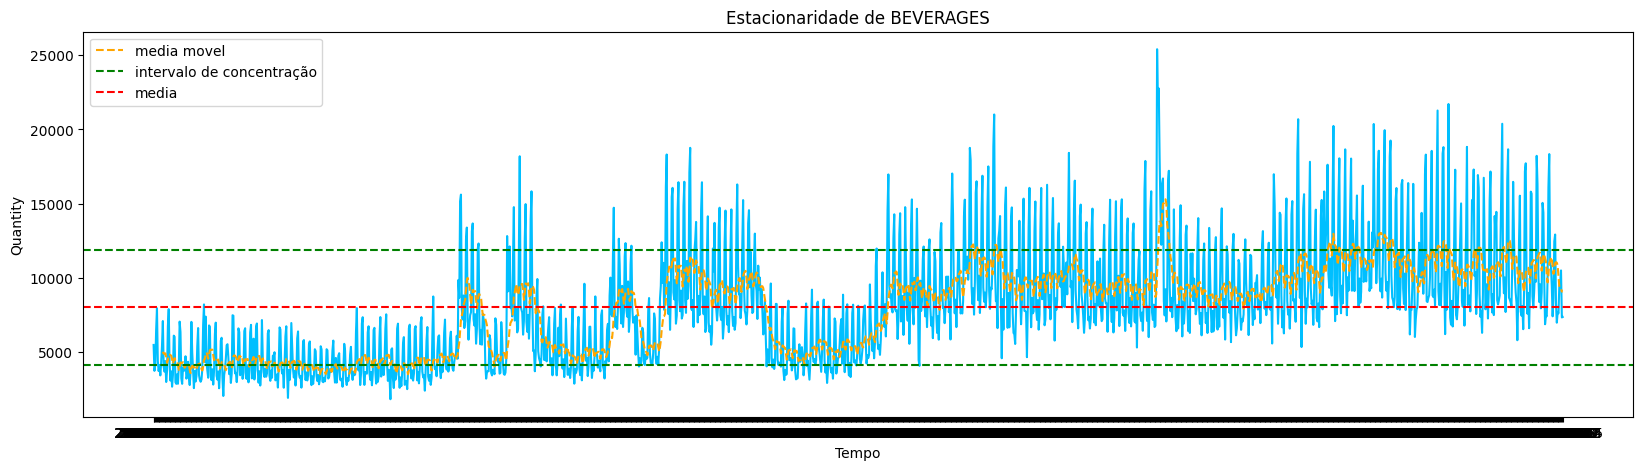

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


A série PRODUCE é estacionária. Nenhuma diferenciação necessária.


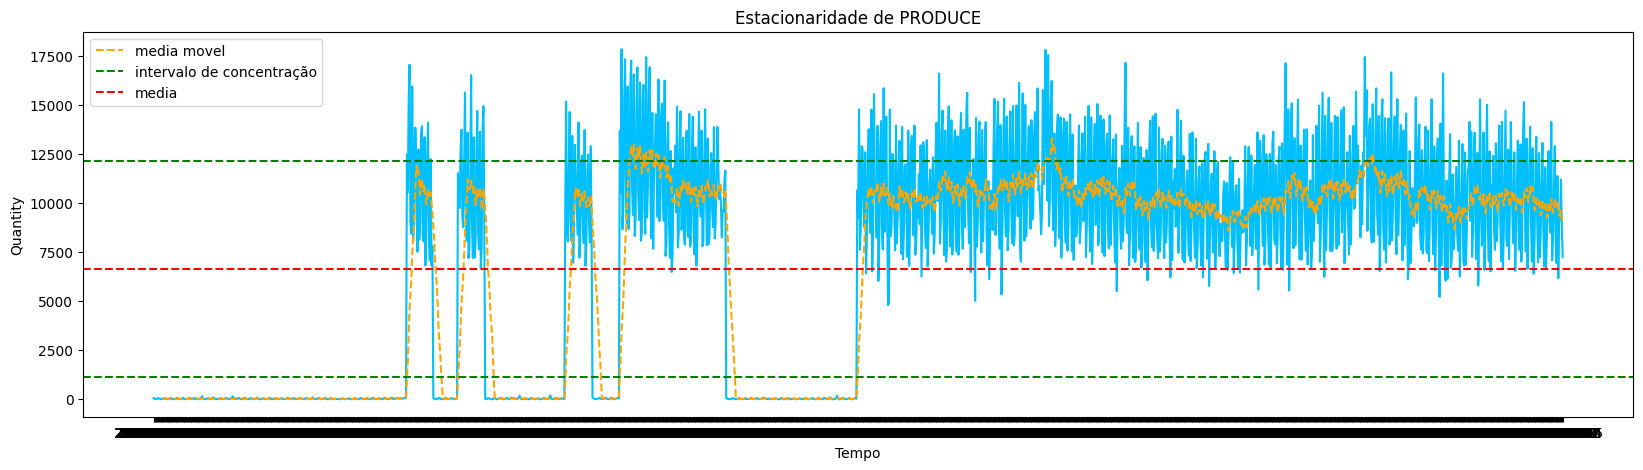

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


A série CLEANING é estacionária. Nenhuma diferenciação necessária.


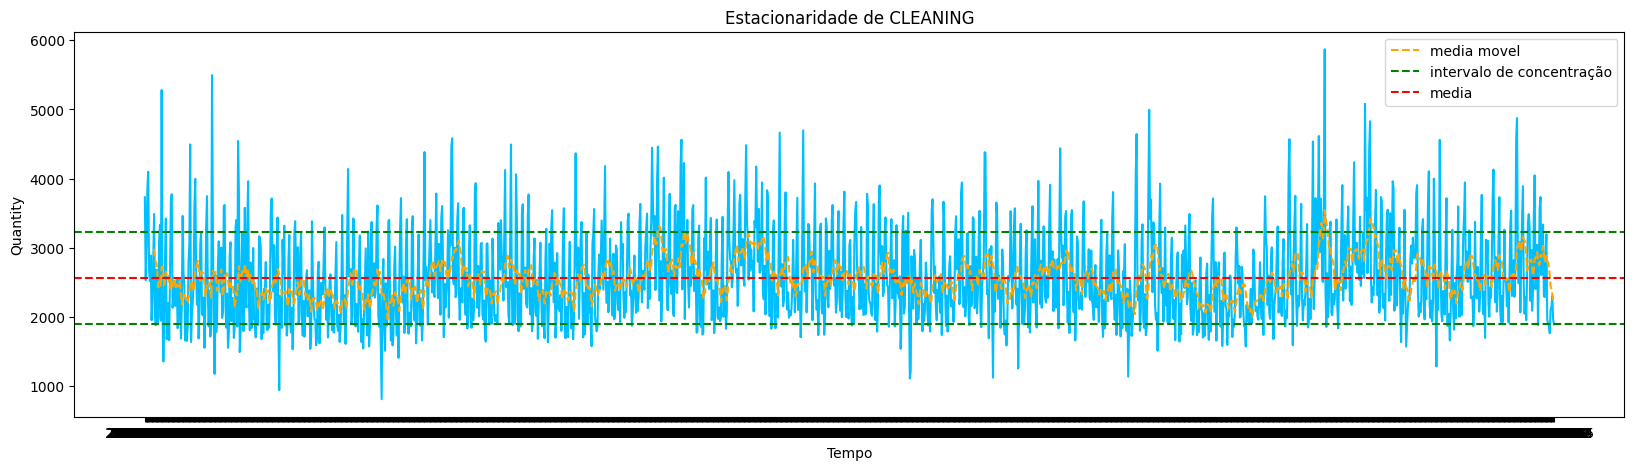

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [326]:
for prod in produtos_mv:
    adf_serie(series_df, prod)

### Decomposição Sazonal

In [327]:
def decomposition(series_df, prod, period=12):

    print('')
    print(f'Decomposição de {prod}')

    decomposition = seasonal_decompose(series_df[prod], model='additive', period=period)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    resid = decomposition.resid

    fig, ax=plt.subplots(4, 1, figsize=(20, 11))

    ax[0].plot(series_df[prod], color='deepskyblue')
    ax[0].set_title('Serie')

    ax[1].plot(decomposition.trend, color='red')
    ax[1].set_title('Tendência')

    ax[2].plot(decomposition.seasonal, color='limegreen')
    ax[2].set_title('Sazonalidade')

    ax[3].plot(decomposition.resid, color='orange')
    ax[3].set_title('Resíduo')

    plt.tight_layout()
    plt.show()

    print('---'*50)

    return trend, seasonal, resid


Decomposição de GROCERY I


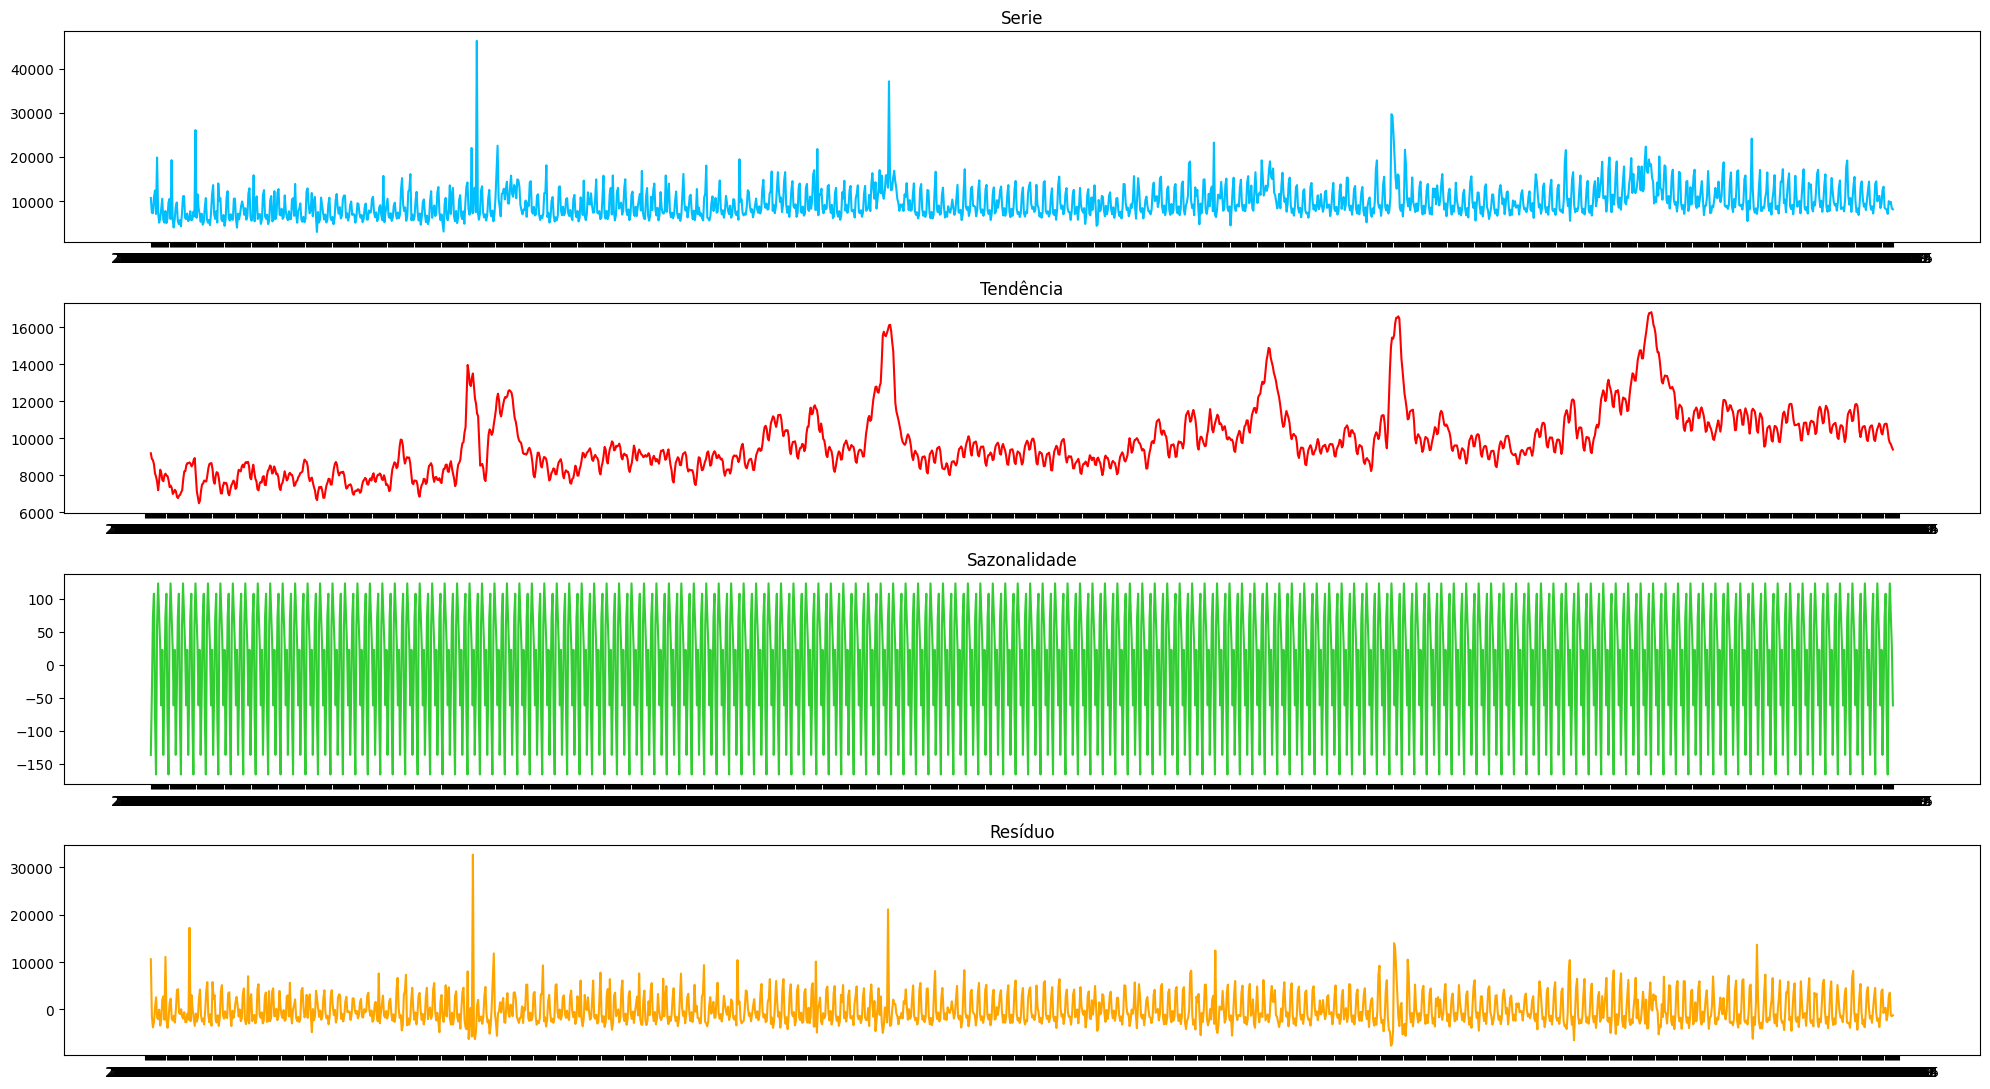

------------------------------------------------------------------------------------------------------------------------------------------------------


In [328]:
caracteristicas = {}

trend_mv, seasonal_mv, resid_mv = decomposition(series_df, produto_mv[0], 12)

caracteristicas[produto_mv[0]] = [trend_mv, seasonal_mv, resid_mv]


Decomposição de BEVERAGES


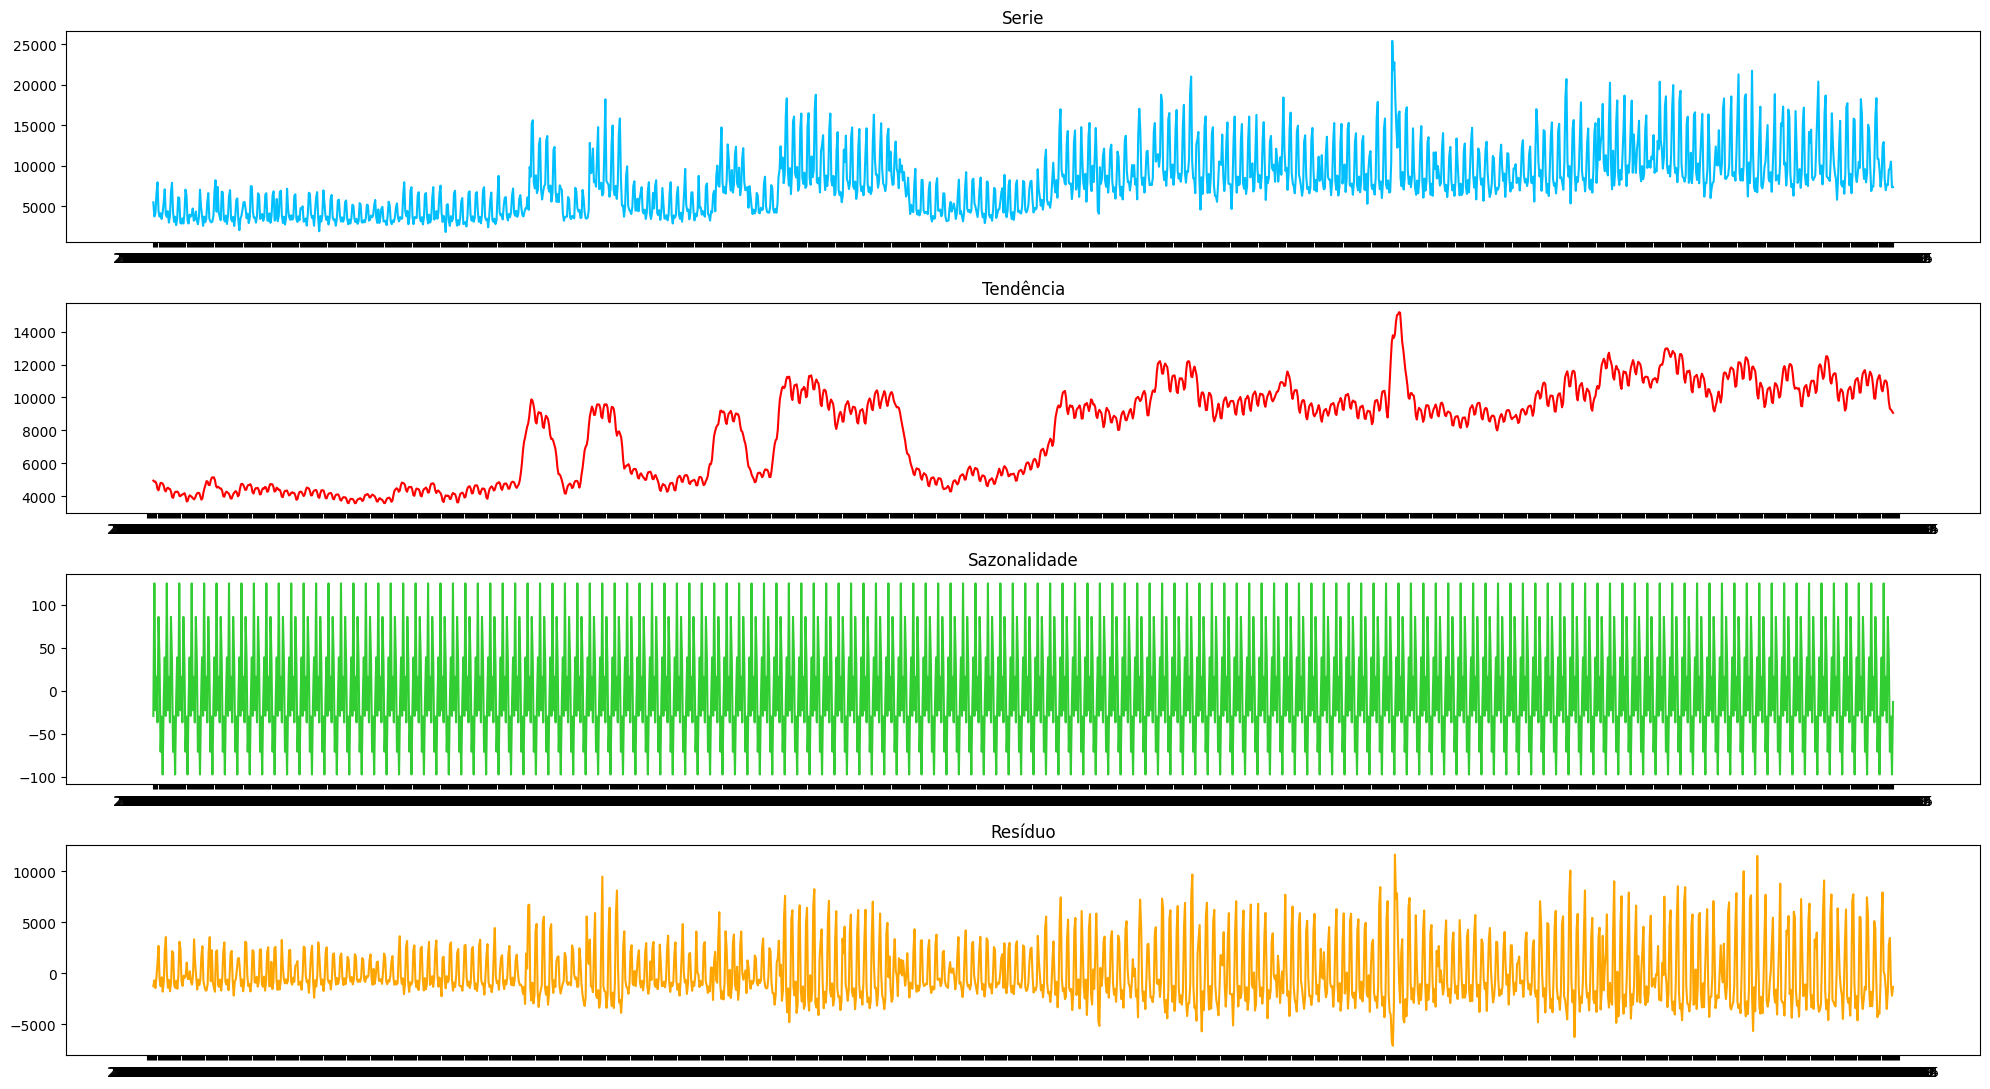

------------------------------------------------------------------------------------------------------------------------------------------------------

Decomposição de PRODUCE


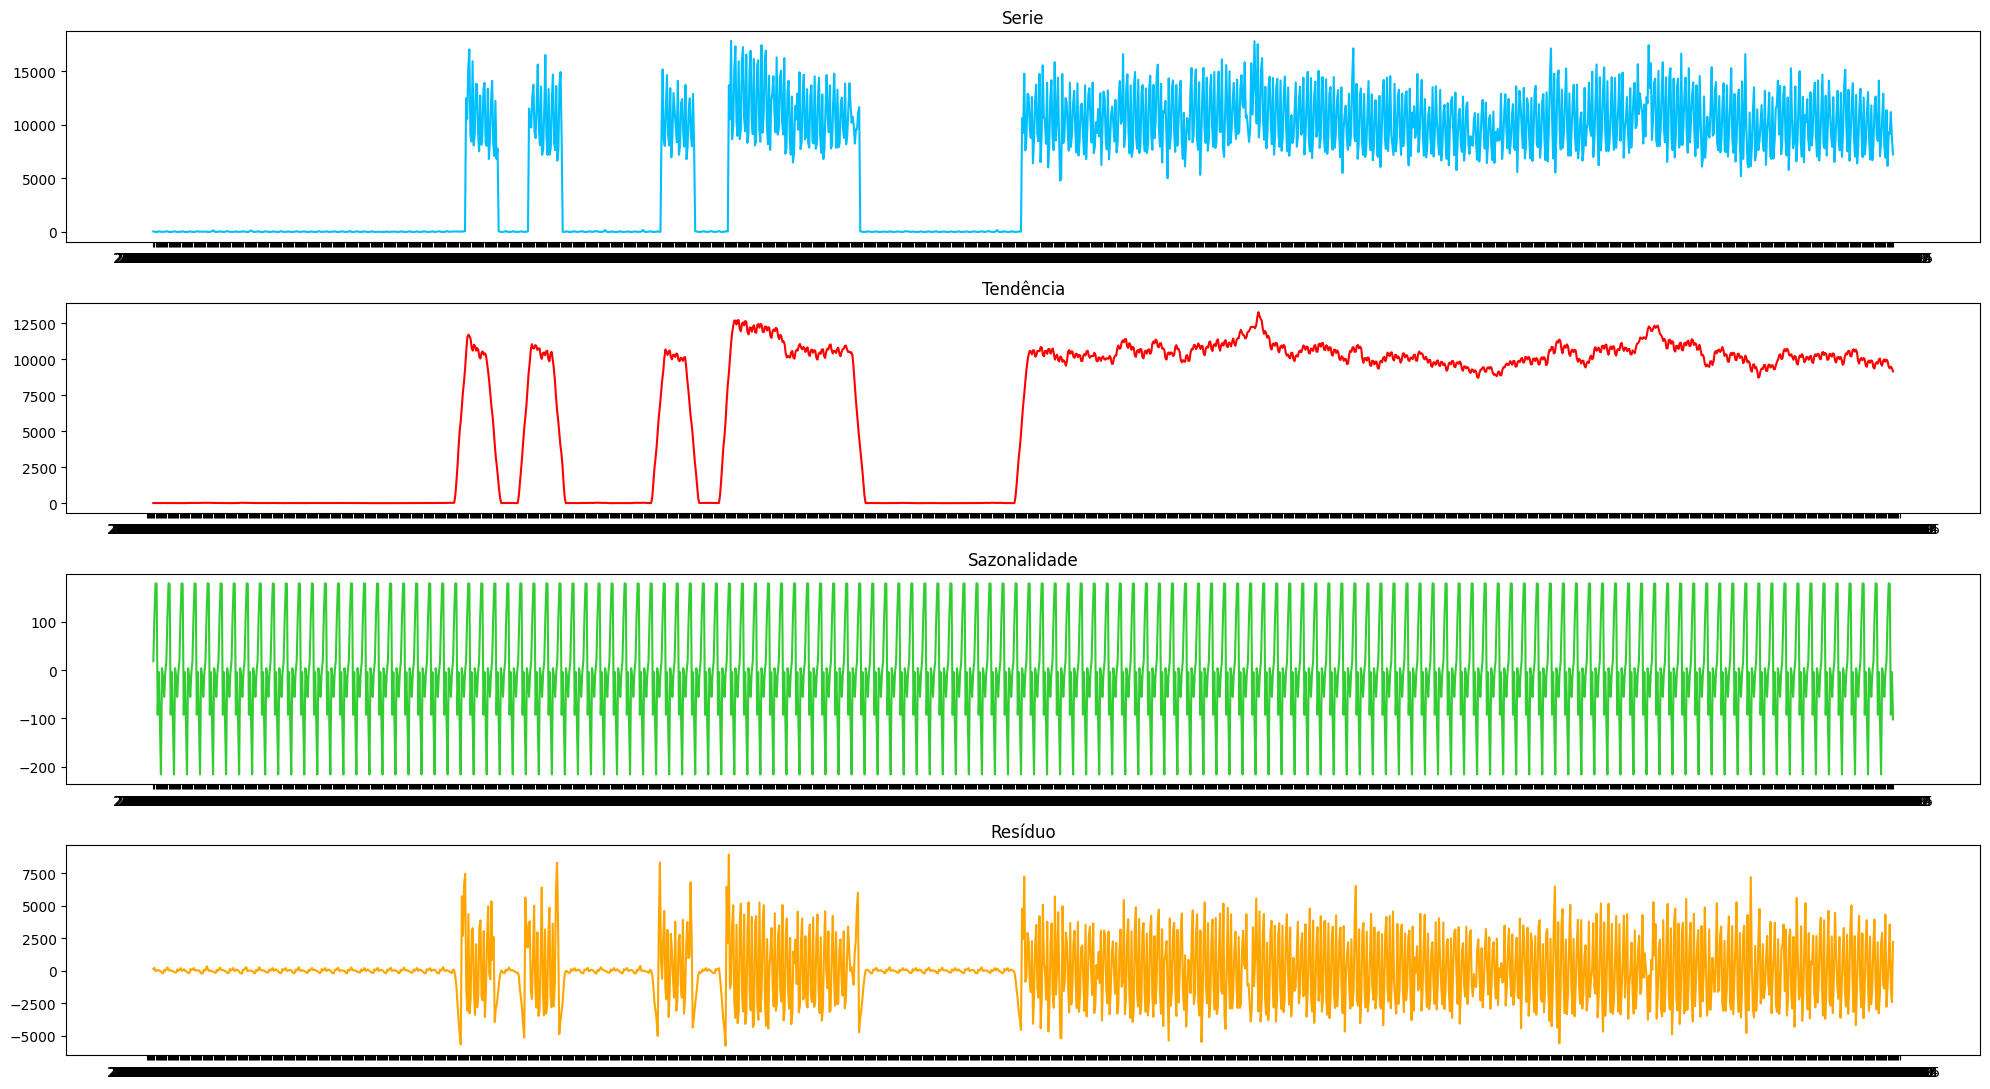

------------------------------------------------------------------------------------------------------------------------------------------------------

Decomposição de CLEANING


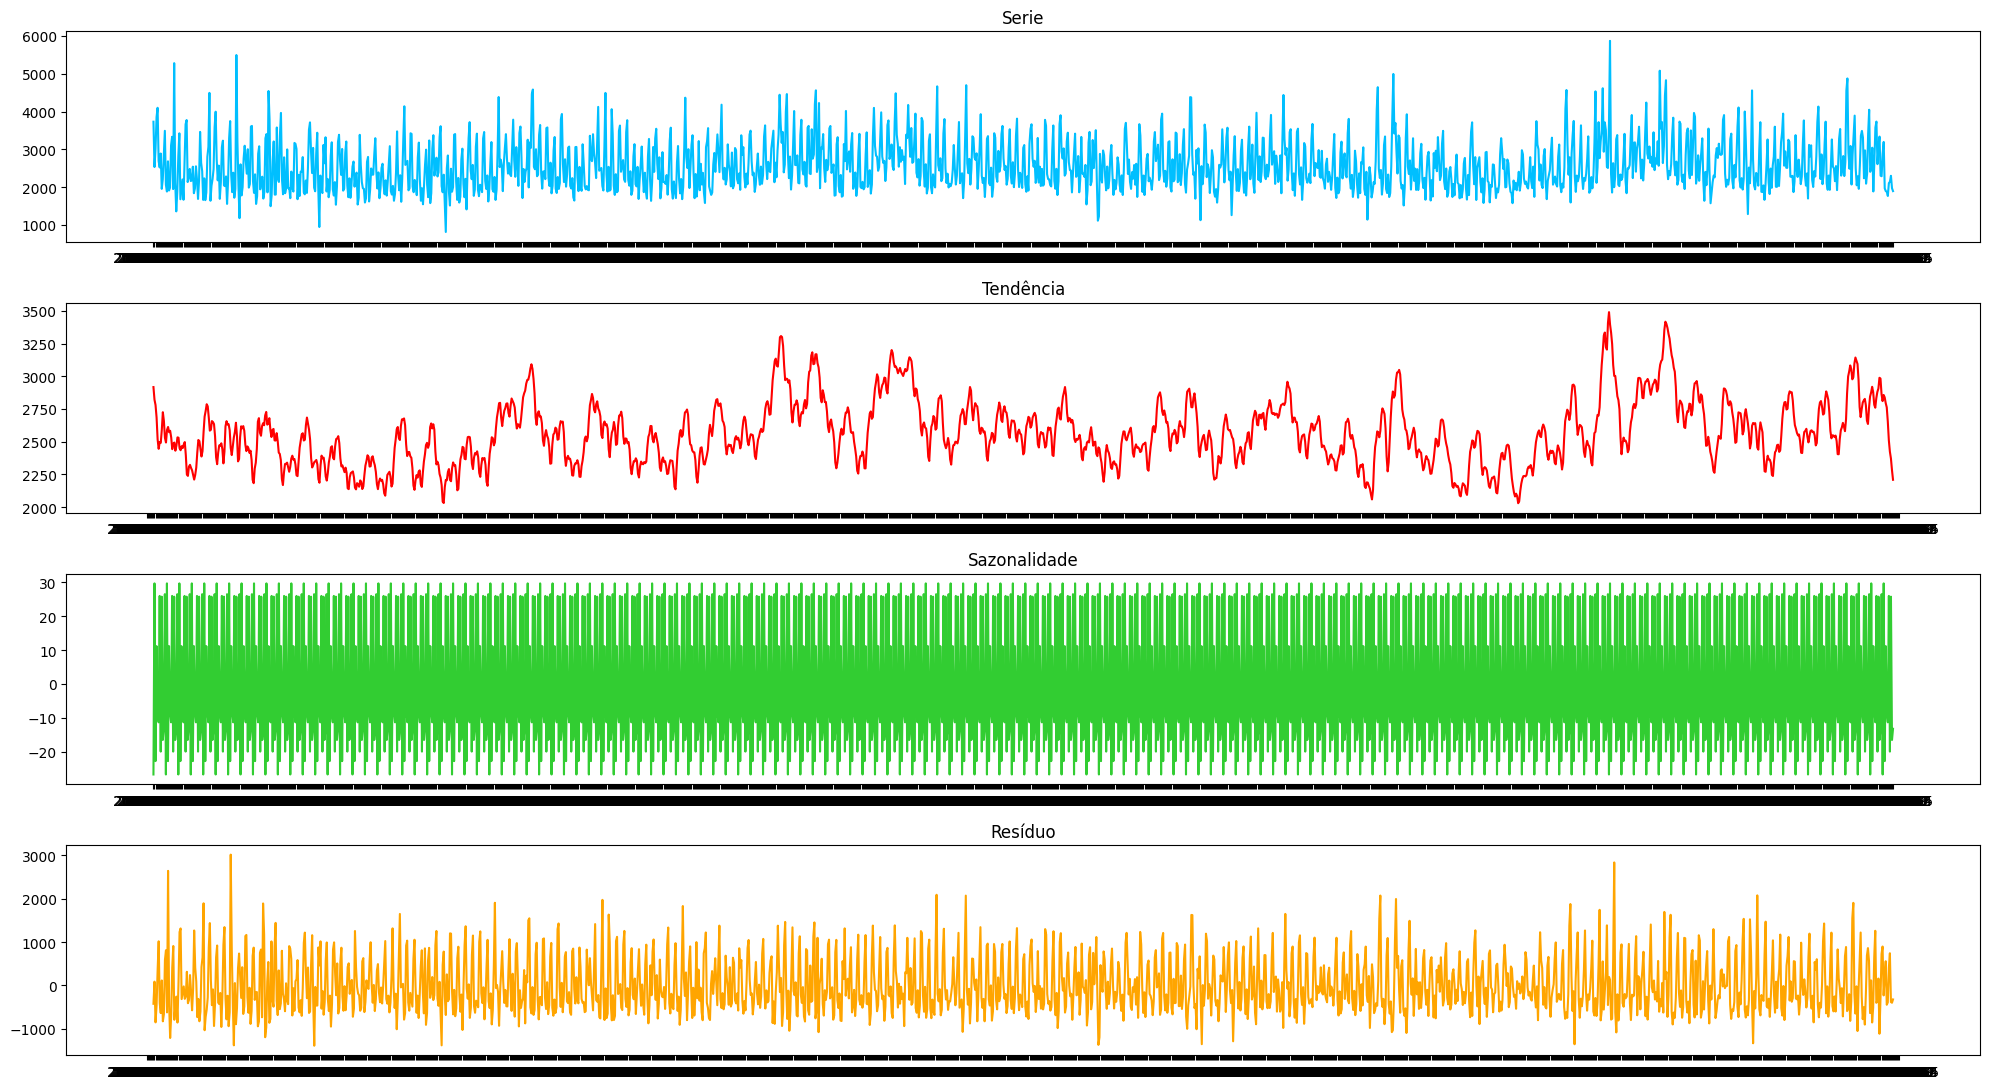

------------------------------------------------------------------------------------------------------------------------------------------------------


In [329]:
for prod in produtos_mv:
    
    trend, seasonal, resid = decomposition(series_df, prod, 12)

    caracteristicas[prod] = [trend, seasonal, resid]


### Autocorrelação dos resíduos das Series (ACF e PACF)

In [330]:
def acf_resid(series_df, prod):

    print('')
    print(f'Gráficos da Autocorrelação dos resíduos de {prod}')

    plt.figure(figsize=(10, 6))
    plot_acf(series_df[prod], lags=7, ax=plt.gca())
    plt.ylabel('Autocorrelação')
    plt.title(f'Autocorrelação (ACF) da Serie de {prod}')
    plt.show()

def pacf_resid(series_df, prod):

    plt.figure(figsize=(10, 6))
    plot_pacf(series_df[prod], lags=7, ax=plt.gca())
    plt.ylabel('Autocorrelação')
    plt.title(f'Autocorrelação Parcial (PACF) da Serie de {prod}')
    plt.show()

    print('')
    print('---'*40)



Gráficos da Autocorrelação dos resíduos de GROCERY I


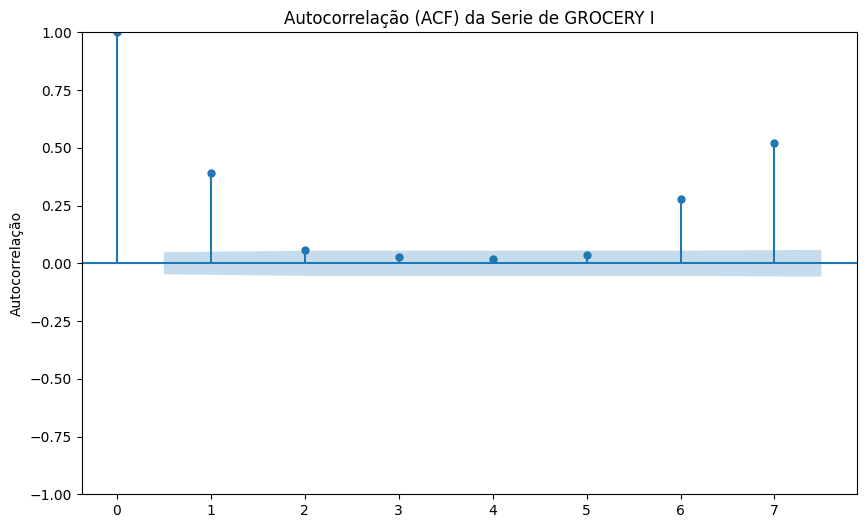

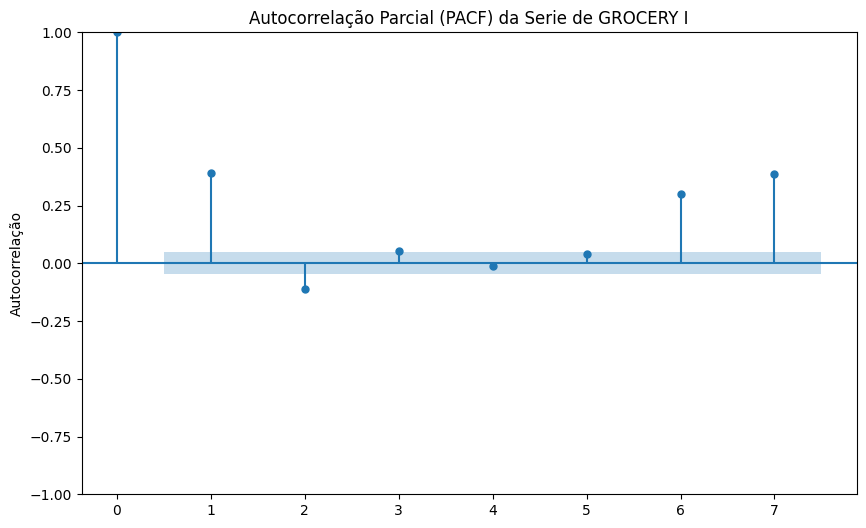


------------------------------------------------------------------------------------------------------------------------


In [331]:
acf_resid(series_df, produto_mv[0])

pacf_resid(series_df, produto_mv[0])


Gráficos da Autocorrelação dos resíduos de BEVERAGES


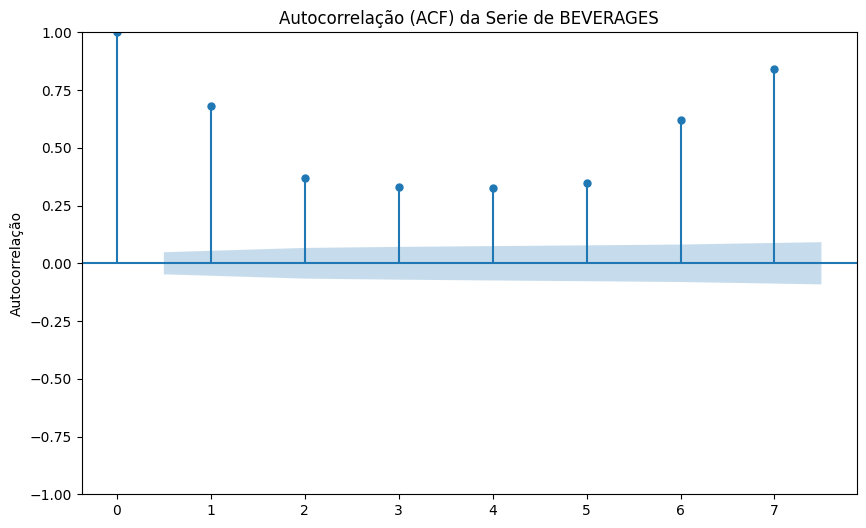

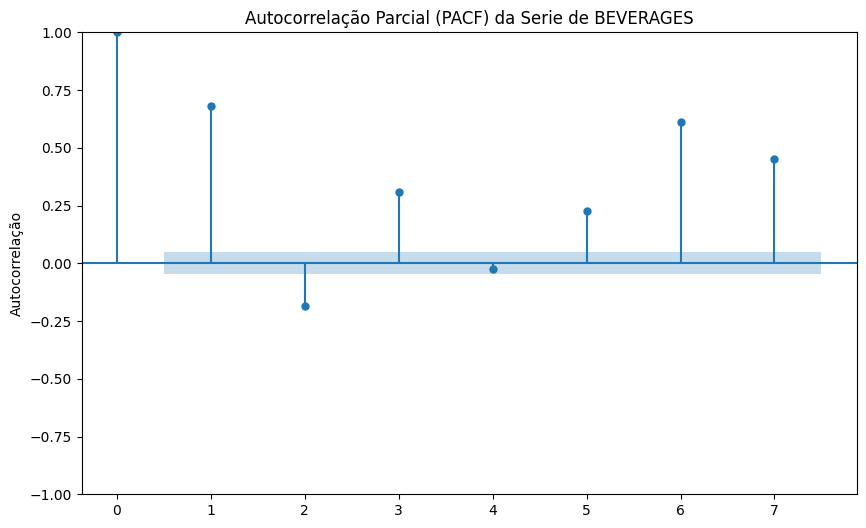


------------------------------------------------------------------------------------------------------------------------

Gráficos da Autocorrelação dos resíduos de PRODUCE


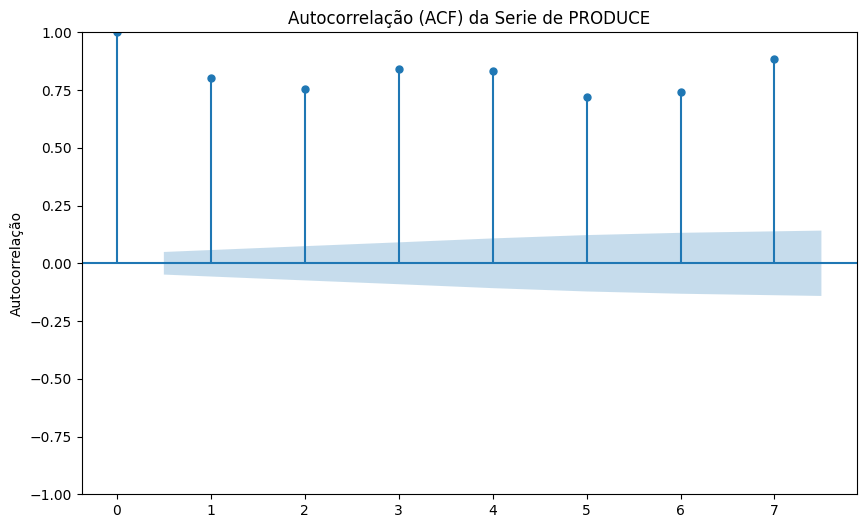

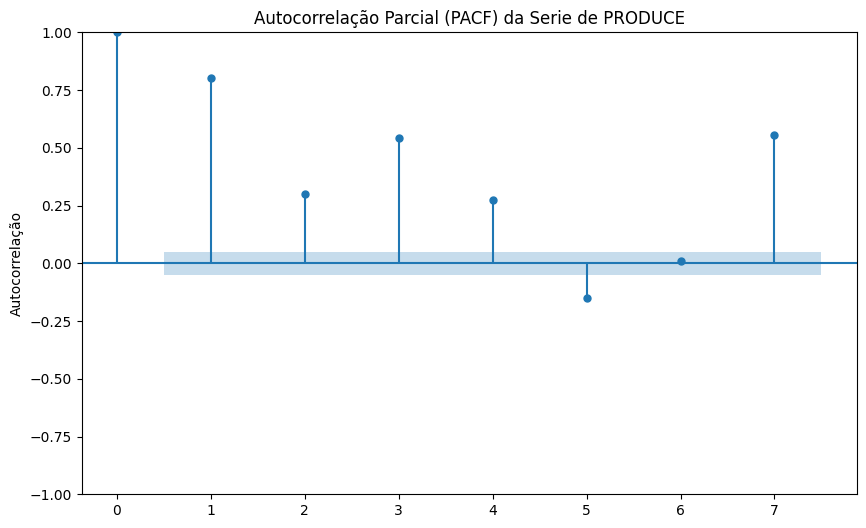


------------------------------------------------------------------------------------------------------------------------

Gráficos da Autocorrelação dos resíduos de CLEANING


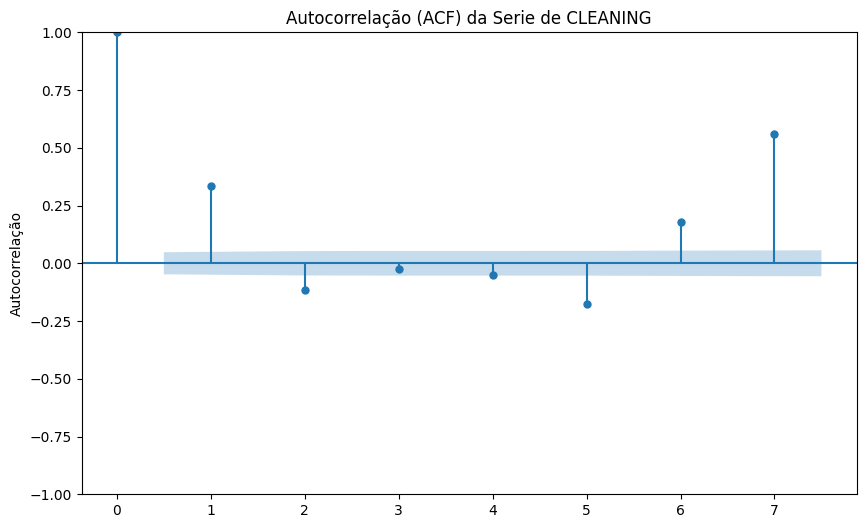

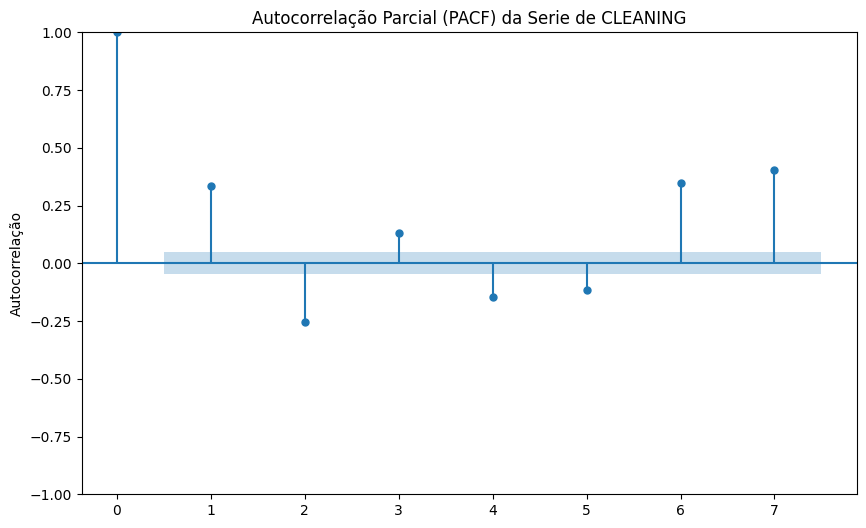


------------------------------------------------------------------------------------------------------------------------


In [332]:
for prod in produtos_mv:
    
    acf_resid(series_df, prod)

    pacf_resid(series_df, prod)

### Transformando Series em Dataframes

In [333]:
produtos_mv

['BEVERAGES', 'PRODUCE', 'CLEANING']

In [334]:
dataframes_series = {}

dataframes_series[produto_mv[0]] = pd.DataFrame(series_df[produto_mv[0]])

dataframes_series[produto_mv[0]]


,quantity
date,
2013-01-02,10686.0
2013-01-03,7342.0
2013-01-04,7250.0
2013-01-05,10699.0
2013-01-06,12373.0
...,...
2017-08-11,9979.0
2017-08-12,9391.0
2017-08-13,9811.0


In [335]:
for prod in produtos_mv:
    
    dataframes_series[prod] = pd.DataFrame(series_df[prod])

dataframes_series

{'GROCERY I':             quantity
 date                
 2013-01-02   10686.0
 2013-01-03    7342.0
 2013-01-04    7250.0
 2013-01-05   10699.0
 2013-01-06   12373.0
 ...              ...
 2017-08-11    9979.0
 2017-08-12    9391.0
 2017-08-13    9811.0
 2017-08-14    8318.0
 2017-08-15    8123.0
 
 [1679 rows x 1 columns],
 'BEVERAGES':             quantity
 date                
 2013-01-02    5466.0
 2013-01-03    3718.0
 2013-01-04    4112.0
 2013-01-05    6458.0
 2013-01-06    7939.0
 ...              ...
 2017-08-11    9517.0
 2017-08-12    9624.0
 2017-08-13   10491.0
 2017-08-14    7322.0
 2017-08-15    7351.0
 
 [1679 rows x 1 columns],
 'PRODUCE':              quantity
 date                 
 2013-03-16     57.000
 2013-03-17     21.000
 2013-03-18      1.000
 2013-03-20     15.000
 2013-03-21     17.000
 ...               ...
 2017-08-11   9311.460
 2017-08-12   9153.445
 2017-08-13  11201.803
 2017-08-14   8735.741
 2017-08-15   7239.617
 
 [1603 rows x 1 columns],
 'CLEANI

### Outliers

#### Identificação dos Outliers

In [490]:
def outliers(df_serie, produto):

    print('Outliers de ', produto)

    if 'quantity' not in df_serie[produto].columns:
        raise ValueError(f"A coluna 'quantity' não existe no DataFrame para o produto {produto}")


    df_serie[produto]['quantity'].plot.box()
    plt.title('Quantidade')
    plt.show()

    print('')

    z_scores = stats.zscore(df_serie[produto]['quantity'])
    outliers = df_serie[produto][np.abs(z_scores) > 3]

    print(f"Número de outliers: {outliers.shape[0]}")

    print(outliers)

    print('')
    print('---'*40)
    print('')
    
    return outliers

Outliers de  GROCERY I


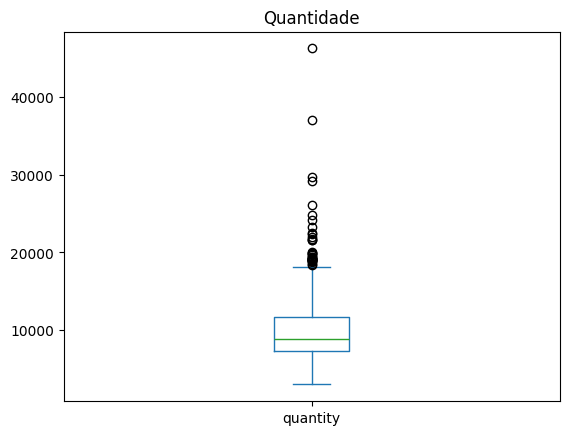


Número de outliers: 14
            quantity
date                
2013-02-14   26067.0
2013-11-07   22024.0
2013-11-12   46271.0
2013-12-02   22534.0
2014-10-08   21785.0
2014-12-16   37106.0
2015-10-27   23233.0
2016-04-17   29670.0
2016-04-18   29193.0
2016-04-19   24861.0
2016-04-30   21613.0
2016-10-02   21540.0
2016-12-18   22318.0
2017-04-01   24134.0

------------------------------------------------------------------------------------------------------------------------



In [491]:
outliers_tds = {}

outliers_tds[produto_mv[0]] = outliers(dataframes_series, produto_mv[0])

Outliers de  BEVERAGES


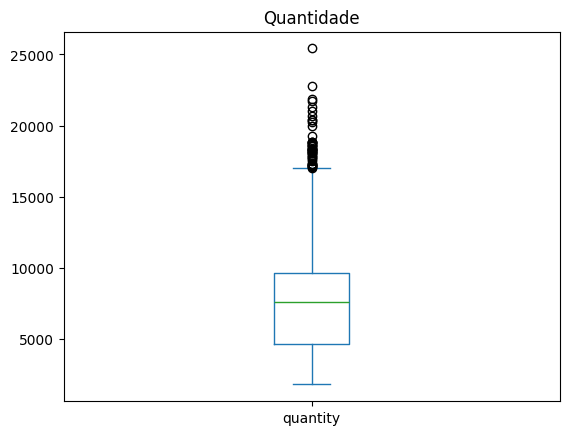


Número de outliers: 11
            quantity
date                
2015-10-04   21011.0
2016-04-17   25413.0
2016-04-18   21878.0
2016-04-19   22770.0
2016-10-02   20692.0
2016-11-13   20236.0
2017-01-02   20369.0
2017-01-15   19953.0
2017-03-19   21278.0
2017-04-01   21718.0
2017-06-04   20384.0

------------------------------------------------------------------------------------------------------------------------

Outliers de  PRODUCE


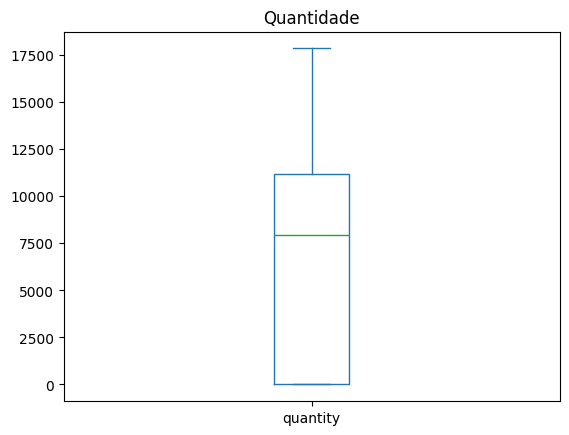


Número de outliers: 0
Empty DataFrame
Columns: [quantity]
Index: []

------------------------------------------------------------------------------------------------------------------------

Outliers de  CLEANING


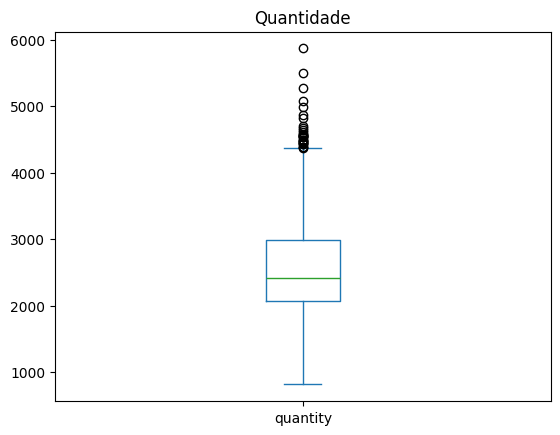


Número de outliers: 15
            quantity
date                
2013-01-22    5280.0
2013-03-23    5495.0
2014-01-05    4582.0
2014-10-05    4561.0
2015-02-01    4666.0
2015-03-01    4697.0
2016-04-03    4644.0
2016-04-18    4994.0
2016-10-02    4570.0
2016-11-06    4616.0
2016-11-13    5869.0
2017-01-02    5080.0
2017-01-08    4829.0
2017-04-01    4559.0
2017-07-02    4875.0

------------------------------------------------------------------------------------------------------------------------



In [492]:
for prod in produtos_mv:
    outliers_tds[prod] = outliers(dataframes_series, prod)

#### Remoção dos Outliers

In [339]:
def remove_outliers(outliers, df):

    df_sem_outliers = df[~df.index.isin(outliers.index)]

    return df_sem_outliers

In [340]:
df_sem_outliers = {}

df_sem_outliers[produto_mv[0]] = remove_outliers(outliers_tds[produto_mv[0]], dataframes_series[produto_mv[0]])

df_sem_outliers[produto_mv[0]]

,quantity
date,
2013-01-02,10686.0
2013-01-03,7342.0
2013-01-04,7250.0
2013-01-05,10699.0
2013-01-06,12373.0
...,...
2017-08-11,9979.0
2017-08-12,9391.0
2017-08-13,9811.0


In [341]:
for prod in produtos_mv:
    df_sem_outliers[prod] = remove_outliers(outliers_tds[prod], dataframes_series[prod])

In [342]:
df_sem_outliers

{'GROCERY I':             quantity
 date                
 2013-01-02   10686.0
 2013-01-03    7342.0
 2013-01-04    7250.0
 2013-01-05   10699.0
 2013-01-06   12373.0
 ...              ...
 2017-08-11    9979.0
 2017-08-12    9391.0
 2017-08-13    9811.0
 2017-08-14    8318.0
 2017-08-15    8123.0
 
 [1665 rows x 1 columns],
 'BEVERAGES':             quantity
 date                
 2013-01-02    5466.0
 2013-01-03    3718.0
 2013-01-04    4112.0
 2013-01-05    6458.0
 2013-01-06    7939.0
 ...              ...
 2017-08-11    9517.0
 2017-08-12    9624.0
 2017-08-13   10491.0
 2017-08-14    7322.0
 2017-08-15    7351.0
 
 [1668 rows x 1 columns],
 'PRODUCE':              quantity
 date                 
 2013-03-16     57.000
 2013-03-17     21.000
 2013-03-18      1.000
 2013-03-20     15.000
 2013-03-21     17.000
 ...               ...
 2017-08-11   9311.460
 2017-08-12   9153.445
 2017-08-13  11201.803
 2017-08-14   8735.741
 2017-08-15   7239.617
 
 [1603 rows x 1 columns],
 'CLEANI

### CSV's Df's sem outliers

In [343]:
#for df in df_sem_outliers:

   #df_sem_outliers[df].to_csv(f'dataset/corporacion-favorit/df_sem_outliers/{df}_sem_outliers.csv')

# Modelos

In [514]:
def metricas(y_true, y_pred):

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    '''print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape}')
    print(f'R2: {r2}')
'''
    return r2, mse, rmse, mape

## Regressão Linear

## ARIMA

In [515]:
def calling_arima(serie, order=(1,1,1)):
    
    serie.index = pd.to_datetime(serie.index)
    serie = serie.asfreq('ME')
    
    y = serie
    
    y_train = y[y.index < '2016-10-24']
    y_test = y[y.index >= '2016-10-24']

    model = ARIMA(y_train, order=order)
    model_fit = model.fit()

    #predições
    predictions = model_fit.forecast(steps=len(y_test))
    print(y_test.dtype)
    print(serie.dtype)

    return y_test, predictions


def compare_arima(serie, y_test, predictions):

    df_compare = pd.DataFrame({
    'y_test': y_test.values,
    'y_pred': predictions.values
        }, index=y_test.index)
    
    fig, ax = plt.subplots(figsize=(20, 5))
    
    plt.plot(serie.index[:len(y_test)], serie.values, label='Dados Reais', color='deepskyblue')
    plt.plot(serie.index[len(y_test):], y_test.values, label='Dados Teste', color='green')
    plt.plot(df_compare.index, df_compare['y_pred'], label='Previsões', color='red', linestyle='--')

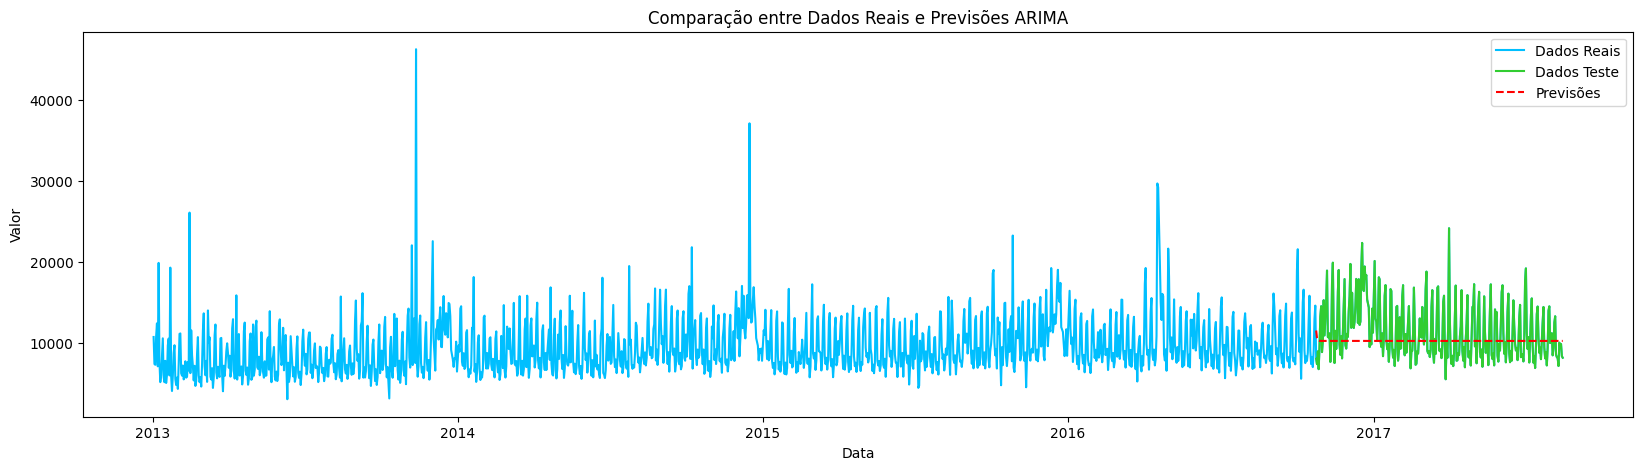

In [516]:
def calling_arima(serie, order=(1, 1, 1)):
    
    serie.index = pd.to_datetime(serie.index)
    serie = serie.asfreq('D', method=None)  

    
    y_train = serie[serie.index < '2016-10-24']
    y_test = serie[serie.index >= '2016-10-24']
    y_test = y_test.dropna()

    
    model = ARIMA(y_train, order=order)
    model_fit = model.fit()


    predictions = model_fit.forecast(steps=len(y_test))

    return y_test, predictions


def compare_arima(serie, y_test, predictions):

    df_compare = pd.DataFrame({
        'y_test': y_test.values,
        'y_pred': predictions.values
    }, index=y_test.index)

    fig, ax = plt.subplots(figsize=(20, 5))
    
    
    plt.plot(serie.index, serie.values, label='Dados Reais', color='deepskyblue')    
    plt.plot(y_test.index, y_test.values, label='Dados Teste', color='limegreen')
    plt.plot(df_compare.index, df_compare['y_pred'], label='Previsões', color='red', linestyle='--')

    plt.legend()
    plt.title('Comparação entre Dados Reais e Previsões ARIMA')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.show()


my_s = series_df['GROCERY I']
y_test_ARIMA, predictions_ARIMA = calling_arima(my_s, order=(1, 1, 1))
compare_arima(my_s, y_test_ARIMA, predictions_ARIMA)

In [517]:
#my_s_o = df_sem_outliers['GROCERY I']
#y_test_ARIMA, predictions_ARIMA = calling_arima(my_s_o, order=(1, 1, 1))
#compare_arima(my_s_o, y_test_ARIMA, predictions_ARIMA)

## Suavização Exponencial

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kamil\AppData\Local\Packages\PythonSoft

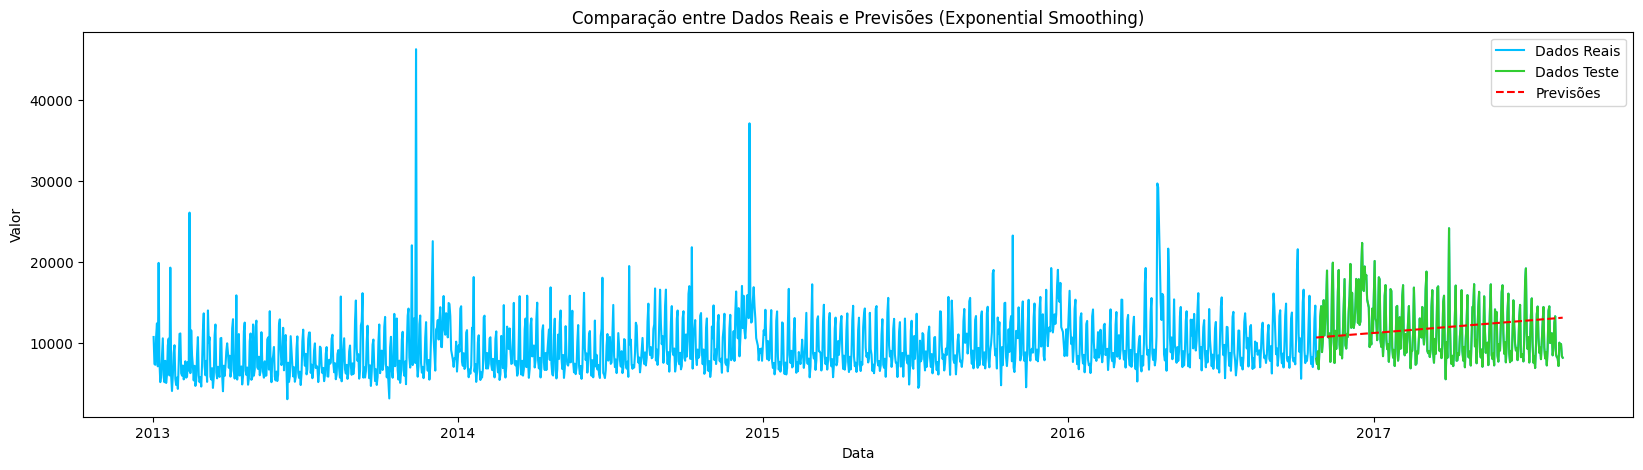

In [518]:
def calling_exponential_smoothing(serie, trend='add', seasonal=None, seasonal_periods=None):
    
    serie.index = pd.to_datetime(serie.index)
    
    y_train = serie[serie.index < '2016-10-24']
    y_test = serie[serie.index >= '2016-10-24']

    # Ajustar o modelo Exponential Smoothing
    model = ExponentialSmoothing(
        y_train,
        trend=trend,  # 'add' para tendência aditiva, 'mul' para multiplicativa, None se não houver tendência
        seasonal=None  # Periodicidade sazonal (se aplicável)
    )
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(y_test))

    return y_test, predictions

def compare_exponential_smoothing(serie, y_test, predictions):

    df_compare = pd.DataFrame({
        'y_test': y_test.values,
        'y_pred': predictions.values
    }, index=y_test.index)

    fig, ax = plt.subplots(figsize=(20, 5))
    
    plt.plot(serie.index, serie.values, label='Dados Reais', color='deepskyblue')
    plt.plot(y_test.index, y_test.values, label='Dados Teste', color='limegreen')
    plt.plot(df_compare.index, df_compare['y_pred'], label='Previsões', color='red', linestyle='--')

    plt.legend()
    plt.title('Comparação entre Dados Reais e Previsões (Exponential Smoothing)')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.show()


my_s = series_df['GROCERY I']
y_test_SE, predictions_SE = calling_exponential_smoothing(my_s, trend='add', seasonal=None, seasonal_periods=None)
compare_exponential_smoothing(my_s, y_test_SE, predictions_SE)


## Tweedie Regressor

C:\Users\kamil\AppData\Local\Temp\ipykernel_14328\4035333505.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  serie = serie.fillna(method='ffill')


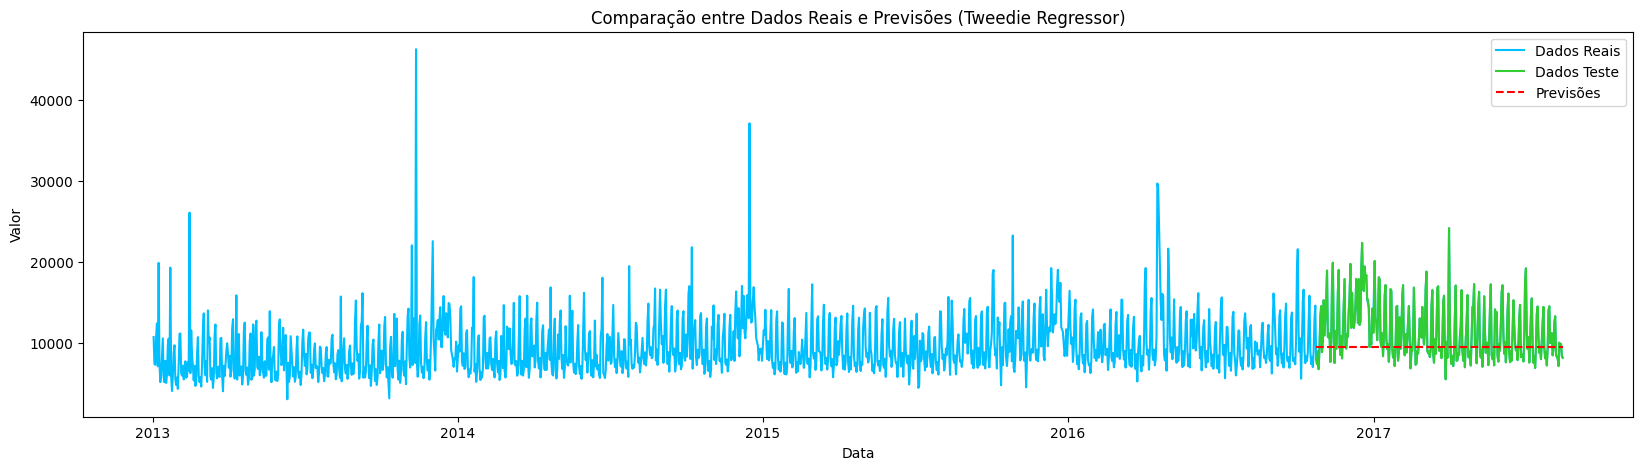

In [519]:
def calling_tweedie_regressor(serie, power=1.0):
    
    #a conversão garante a frequência diária
    serie.index = pd.to_datetime(serie.index)
    serie = serie.asfreq('D', method=None)
    
    #preenche valores ausentes, se houver
    serie = serie.fillna(method='ffill')
    
    y_train = serie[serie.index < '2016-10-24']
    y_test = serie[serie.index >= '2016-10-24']
    
    X_train = np.arange(len(y_train)).reshape(-1, 1)
    X_test = np.arange(len(y_train), len(y_train) + len(y_test)).reshape(-1, 1)

    model = TweedieRegressor(power=power)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    return y_test, predictions

def compare_tweedie_regressor(serie, y_test, predictions):

    df_compare = pd.DataFrame({
        'y_test': y_test.values,
        'y_pred': predictions
    }, index=y_test.index)

    fig, ax = plt.subplots(figsize=(20, 5))
    
    plt.plot(serie.index, serie.values, label='Dados Reais', color='deepskyblue')
    plt.plot(y_test.index, y_test.values, label='Dados Teste', color='limegreen')
    plt.plot(df_compare.index, df_compare['y_pred'], label='Previsões', color='red', linestyle='--')

    plt.legend()
    plt.title('Comparação entre Dados Reais e Previsões (Tweedie Regressor)')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.show()

my_s = series_df['GROCERY I']
y_test_TR, predictions_TR = calling_tweedie_regressor(my_s, power=1.0)
compare_tweedie_regressor(my_s, y_test_TR, predictions_TR)


# Metricas de Erro

In [520]:
metricas_ARIMA = metricas(y_test_ARIMA, predictions_ARIMA)
metricas_SE = metricas(y_test_SE, predictions_SE)
metricas_TR = metricas(y_test_TR, predictions_TR)

metricas_erro = [metricas_ARIMA, metricas_SE, metricas_TR]

In [521]:
#df_metricas = {'Arima com Outliers': {}, 'Arima sem Outliers': {}, 'Suavização Exponencial': {}, 'Tweedie Regressor': {}}
#df_metricas = {'Arima com Outliers': {}, 'Suavização Exponencial': {}, 'Tweedie Regressor': {}}
df_metricas = {'Arima': {}, 'Suav Exp': {}, 'Tweedie Reg': {}}
nomes_metricas = ['R2', 'MSE', 'RMSE', 'MAPE']

for modelo in df_metricas.keys():
    idx = list(df_metricas.keys()).index(modelo)
    for i, nome_metrica in enumerate(nomes_metricas):
        if idx < len(metricas_erro):
            df_metricas[modelo][nome_metrica] = float(metricas_erro[idx][i])
        else:
            df_metricas[modelo][nome_metrica] = None


df_metricas = pd.DataFrame(df_metricas)

df_metricas = df_metricas.round(2)

df_metricas

,Arima,Suav Exp,Tweedie Reg
R2,-0.12,-0.16,-0.33
MSE,13478744.41,13931215.77,15983167.03
RMSE,3671.34,3732.45,3997.90
MAPE,0.22,0.29,0.22


In [522]:
df_metricas.T

,R2,MSE,RMSE,MAPE
Arima,-0.12,13478744.41,3671.34,0.22
Suav Exp,-0.16,13931215.77,3732.45,0.29
Tweedie Reg,-0.33,15983167.03,3997.90,0.22
